In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import style
import matplotlib as plt


## 1. Analysis objective
A client has a demand to sell his car but he does not know which factors of a car affect on selling price. Below is a dataset contains car information. Based on this dataset, define different group of car price for client reference.  

### Reading data from URL and adding related headers

In [3]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [4]:
headers = ["symboling","normalized_losses","make","fuel_type","aspiration", "num_of_doors","body_style",
         "drive_wheels","engine_location","wheel_base", "length","width","height","curb_weight","engine_type",
         "num_of_cylinders", "engine_size","fuel_system","bore","stroke","compression_ratio","horsepower",
         "peak_rpm","city_mpg","highway_mpg","price"]

In [5]:
df = pd.read_csv(filename, names = headers)

In [6]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. Data wrangling
Section objective: Cleaning data in order to use dataframe method from pandas.
### 2a. Replacing and handling NaN data

In [7]:
#replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
#check Null value
missing_data = df.isnull()
missing_data.head(5)


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Converting data types of some object columns: "normalized_losses", "stroke", "bore", "horsepower", "peak_rpm"

In [9]:
#count which col contained missing_data
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())

symboling
False    205
Name: symboling, dtype: int64
normalized_losses
False    164
True      41
Name: normalized_losses, dtype: int64
make
False    205
Name: make, dtype: int64
fuel_type
False    205
Name: fuel_type, dtype: int64
aspiration
False    205
Name: aspiration, dtype: int64
num_of_doors
False    203
True       2
Name: num_of_doors, dtype: int64
body_style
False    205
Name: body_style, dtype: int64
drive_wheels
False    205
Name: drive_wheels, dtype: int64
engine_location
False    205
Name: engine_location, dtype: int64
wheel_base
False    205
Name: wheel_base, dtype: int64
length
False    205
Name: length, dtype: int64
width
False    205
Name: width, dtype: int64
height
False    205
Name: height, dtype: int64
curb_weight
False    205
Name: curb_weight, dtype: int64
engine_type
False    205
Name: engine_type, dtype: int64
num_of_cylinders
False    205
Name: num_of_cylinders, dtype: int64
engine_size
False    205
Name: engine_size, dtype: int64
fuel_system
False    205
Name: 

Based on above summary:

"normalized-losses": 41 missing data

"num-of-doors": 2 missing data

"bore": 4 missing data

"stroke": 4 missing data

"horsepower": 2 missing data

"peak-rpm": 2 missing data

"price": 4 missing data

Replace by mean:
"normalized_losses", "bore", "stroke", "horsepower", "peak_rpm"

As four doors is most frequent for car/sedan as well:
Replace by frequency: "num_of_doors"

Since price is critical to predict, without price input, the whole data row is not useful:
Drop the whole row: "price"

In [10]:
avg_norm_loss = df['normalized_losses'].astype("float").mean(axis=0)

In [11]:
#replace Nan value in normalized_losses column by mean
df['normalized_losses'].replace(np.nan, avg_norm_loss, inplace=True)

In [12]:
avg_bore = df['bore'].astype('float').mean(axis=0)

In [13]:
#replace Nan value in bore column by mean
df['bore'].replace (np.nan, avg_bore, inplace=True)

In [14]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)

In [15]:
#replace Nan value in stroke column by mean
df['stroke'].replace (np.nan, avg_stroke, inplace=True)

In [16]:
avg_horse = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horse, inplace=True)

In [17]:
avg_rpm = df['peak_rpm'].astype('float').mean(axis=0)
df['peak_rpm'].replace(np.nan, avg_rpm, inplace=True)

In [18]:
#count values in num_of_doors column, which value is most counted?
df['num_of_doors'].value_counts().idxmax()

'four'

In [19]:
#replace Nan value in num_of_doors by most frequency value "four"
df['num_of_doors'].replace(np.nan, 'four', inplace=True)

In [20]:
#drop all Nan in "price" column
df.dropna(subset=['price'], axis=0, inplace=True)
#reset index because of dropping 2 rows
df.reset_index(drop=True, inplace=True)

In [21]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2b. Data formatting

In [22]:
df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [23]:
df['normalized_losses'] = df['normalized_losses'].astype('int')
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['peak_rpm'] = df['peak_rpm'].astype('float')
df['price'] = df['price'].astype('float')

### 2c. Data standardization
To make meaningful comparison for this dataset in other country that accepts L/100km standard, fuel consumption in both columns "city_mpg" and "highway_mpg" (miles per gallon) unit is needed to transform. 

Followed by unit conversion formula:
L/100km = 235/mpg

In [24]:
df['city_l100km'] = 235/df['city_mpg']
df['highway_l100km'] = 235/df['highway_mpg']

### 2d. Data Normalization
Normalize a typical variable into similar range. In this case, scale 3 columns: "length", "width" and "height" to value range from 0 to 1.

Followed by replacing original value by: (original value) / (max value)

In [25]:
df['length']= df['length']/df['length'].max()
df['width']= df['width']/df['width'].max()
df['height']= df['height']/df['height'].max()

### 2e. Binning
In this dataset, assume that prices are different between "horsepower" groups. Therefore, need to rearrange "horsepower" into three segments: high, medium and low by binning.

In [26]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', 104.25615763546799, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [27]:
#due to 1 replace value is float, convert "horsepower" into int
df['horsepower'] = df['horsepower'].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower distribution')

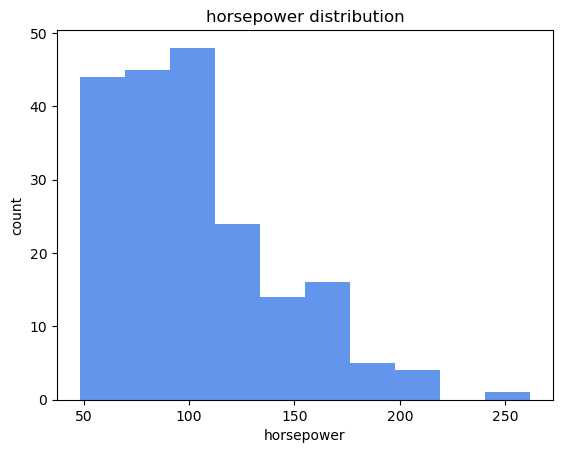

In [28]:
plt.pyplot.hist(df["horsepower"], color = 'cornflowerblue')

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower distribution")


In [29]:
#build 3 equal length bins => 4 steps
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)


In [30]:
#group 3 bins into 3 groups
group_names = ['Low', 'Medium', 'High']

#create new grouped horsepower column
df['horsepower_grouped'] = pd.cut(df['horsepower'], bins = bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower_grouped', 'price']].head(20)

,horsepower,horsepower_grouped,price
0,111,Low,13495.0
1,111,Low,16500.0
2,154,Medium,16500.0
3,102,Low,13950.0
4,115,Low,17450.0
5,110,Low,15250.0
6,110,Low,17710.0
7,110,Low,18920.0
8,140,Medium,23875.0
9,101,Low,16430.0


In [31]:
df['horsepower_grouped'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower_grouped, dtype: int64

Text(0.5, 1.0, 'horsepower grouped')

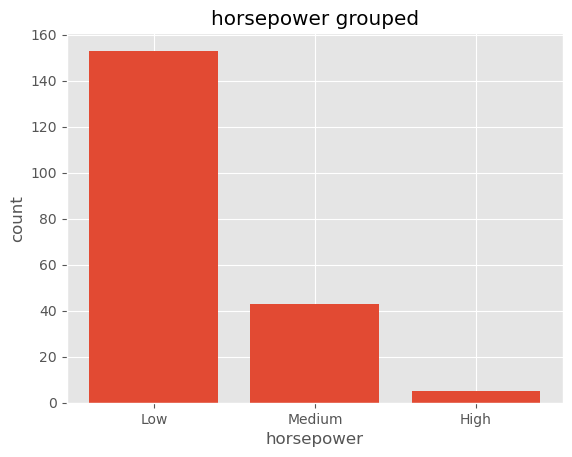

In [32]:
#display group of horsepower distribution
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

pyplot.bar(group_names, df["horsepower_grouped"].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower grouped")

### 2f. Dummy variable
Assign numerical values to different categories of fuel type: "gas", "diesel"

In [33]:
dummy_variable_1 = pd.get_dummies(df['fuel_type'])
dummy_variable_1.rename(columns={'gas' : 'fuel_type_gas', 'diesel': 'fuel_type_diesel'}, inplace=True)

#merge dummy_variable_1 to original df
df = pd.concat([df, dummy_variable_1], axis=1)

#drop original "fuel_type" column from df
df.drop('fuel_type', axis=1, inplace=True)

In [34]:
df['aspiration']

0        std
1        std
2        std
3        std
4        std
       ...  
196      std
197    turbo
198      std
199    turbo
200    turbo
Name: aspiration, Length: 201, dtype: object

In [35]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std' : 'aspriration_std', 'turbo': 'aspriration_turbo'}, inplace=True)

#merge dummy_variable_1 to original df
df = pd.concat([df, dummy_variable_2], axis=1)

#drop original "fuel_type" column from df
df.drop('aspiration', axis=1, inplace=True)

## 3. Exploratory Data Analysis (EDA)
Section objective: What are the main characteristics have the most impact on the car price?

In [36]:
import seaborn as sns 

### 3a. Analyzing individual feature pattern using visualization


In [37]:
#Check data type of variable before choosing visualization method
df.dtypes

symboling                int64
normalized_losses        int64
make                    object
num_of_doors            object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
num_of_cylinders        object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm               float64
city_mpg                 int64
highway_mpg              int64
price                  float64
city_l100km            float64
highway_l100km         float64
horsepower_grouped    category
fuel_type_diesel         uint8
fuel_type_gas            uint8
aspriration_std          uint8
aspriration_turbo        uint8
dtype: object

### Continuous numerical variables



In [38]:
df[['bore', 'stroke', 'compression_ratio', 'horsepower']].corr()

,bore,stroke,compression_ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression_ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


(0.0, 53434.43310998228)

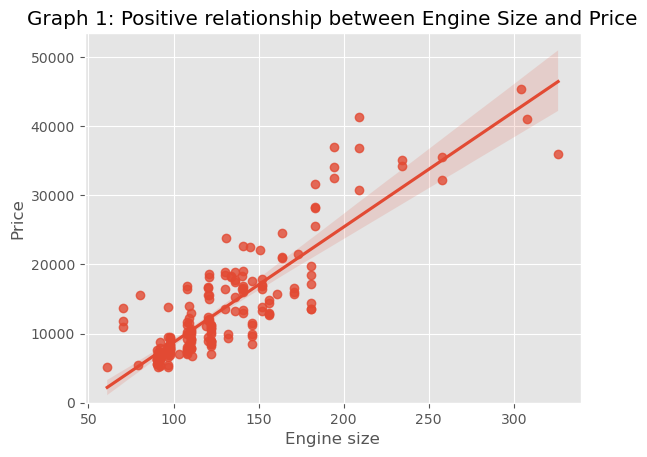

In [39]:
#display linear relationship by scatter plot
sns.regplot(x='engine_size', y='price', data=df)
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.title ('Graph 1: Positive relationship between Engine Size and Price')
plt.ylim(0,)

As indicated in Graph 1, when Engine size increases, the Price goes up also. This is a positive relationship between two variables. Since the regression line is almost a perfect diagonal line, Engine size seems like a good predictor of Price. 

In [40]:
#examine corr btw 'engine_size' and 'price'
df[['engine_size','price']].corr()

,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


Corr btw 'engine_size' and 'price' is 0.87 nearly to 1. 

(0.0, 48179.01379613252)

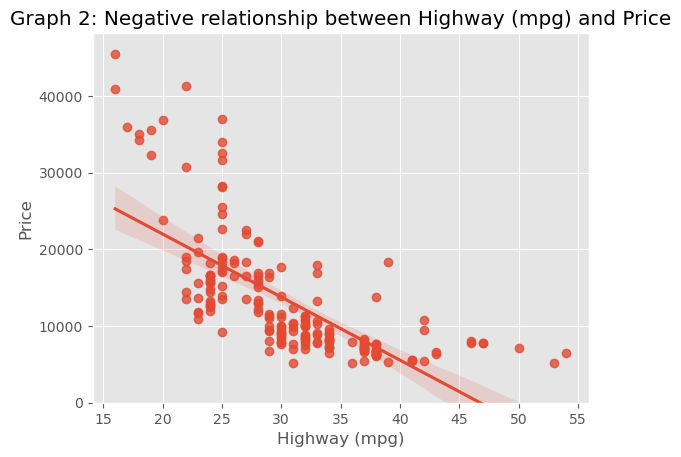

In [41]:
#display linear relationship by scatter plot
sns.regplot(x='highway_mpg', y='price', data=df)
plt.xlabel('Highway (mpg)')
plt.ylabel('Price')
plt.title ('Graph 2: Negative relationship between Highway (mpg) and Price')
plt.ylim(0,)

In Graph 2, when Highway (mpg) goes up, the Price goes down. This is a negative relationship between two variables. Highway (mpg) in this case potentially be a predictor of Price. 

In [42]:
#examine corr btw 'highway_mpg' and 'price'
df[['highway_mpg','price']].corr()

,highway_mpg,price
highway_mpg,1.000000,-0.704692
price,-0.704692,1.000000


Corr btw 'highway_mpg' and 'price' is -0.7 nearly to -1. 

### Categorical Variables


Text(0, 0.5, 'Price')

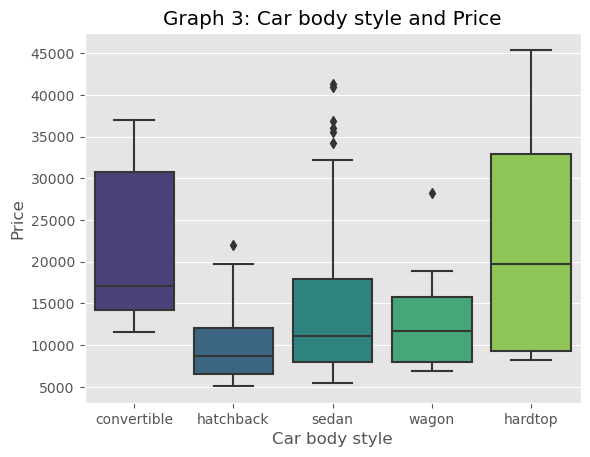

In [43]:
#display relationship between "body_style" and "price"
sns.boxplot(x="body_style", y="price", data=df, palette='viridis')

plt.title('Graph 3: Car body style and Price')
plt.xlabel('Car body style')
plt.ylabel('Price')

There is significant overlap in price range such as "convertible" versus "hardtop, "hatchback" vs. "sedan" vs. wagon. In Graph 3, car body style is not a good predictor of price. 

Text(0, 0.5, 'Price')

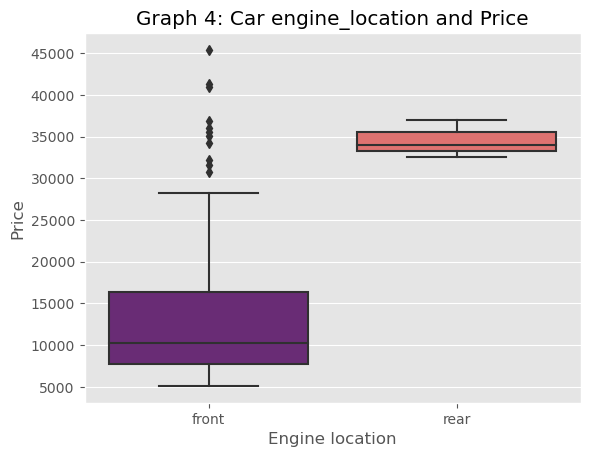

In [44]:
#display relationship between "engine_location" and "price"
sns.boxplot(x="engine_location", y="price", data=df, palette='magma')

plt.title('Graph 4: Car engine_location and Price')
plt.xlabel('Engine location')
plt.ylabel('Price')

The distribution of price between two different engine_location categories, front and rear, are distinct enough to take engine_location as a potential predictor of price (Graph 4). 

### 3b. Descriptive Statistic Analysis

In [45]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,peak_rpm,city_mpg,highway_mpg,price,city_l100km,highway_l100km,fuel_type_diesel,fuel_type_gas,aspriration_std,aspriration_turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [46]:
#drive_wheels as variable
drive_wheels_counts = df['drive_wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive_wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive_wheels'
drive_wheels_counts

,value_counts
drive_wheels,
fwd,118
rwd,75
4wd,8


The examination of drive_wheels value counts shows that while 8 cars has 4wd, 118 cars has fwd and 75 cars has rwd. The result by this statiscal analysis is skewed so there is still no conclusion about drive_wheels and its price here.

In [47]:
#engine_location as variable
engine_loc_counts = df['engine_location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine_location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine_location'
engine_loc_counts

,value_counts
engine_location,
front,198
rear,3


Also can see here, 198 cars with front engine while only 3 cars with rear engine. This result is skewed hence, can not be concluded.

### 3c. Grouping

In [48]:
#group data by "drive_wheels" categories
df_group_one = df[['drive_wheels', 'body_style', 'price']] 
df_group_one = df_group_one.groupby(['drive_wheels'], as_index=False).mean()
df_group_one

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_44652/1572509215.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive_wheels'], as_index=False).mean()


,drive_wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


On average, price of 4-wheel drive (4wd) and front-wheel drive (fwd) are the same. In contrast, the most expensive price is rear-wheel drive.

In [49]:
#group data by "drive_wheels" and "body_style" categories
df_group_two = df[['drive_wheels','body_style','price']]
df_group_two = df_group_two.groupby(['drive_wheels','body_style'],as_index=False).mean()
df_group_two


,drive_wheels,body_style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [50]:
#to make the group two table data easily to read, display as a pivot table 
df_group_two_pivot = df_group_two.pivot(index='drive_wheels', columns='body_style')
#as convertible and hardtop body style do not have 4wd, some pivot cells are missing. Replacing NaN by 0
df_group_two_pivot = df_group_two_pivot.fillna(0)
df_group_two_pivot

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

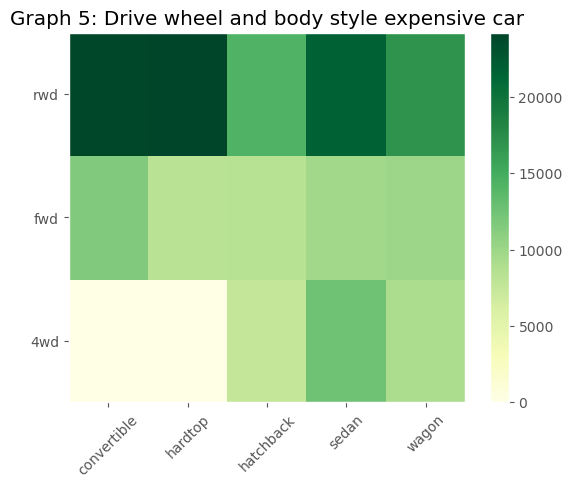

In [51]:
#visualize df_group_two with variables: drive_wheels and body_style vs. price
fig, ax = plt.subplots()
im = ax.pcolor(df_group_two_pivot, cmap='YlGn')


row_labels = df_group_two_pivot.columns.levels[1]
col_labels = df_group_two_pivot.index


ax.set_xticks(np.arange(df_group_two_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_group_two_pivot.shape[0]) + 0.5, minor=False)


ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)


plt.xticks(rotation=45, size=10)

fig.colorbar(im)
plt.title("Graph 5: Drive wheel and body style expensive car")
plt.show()

Car price in Graph 5 is strongly related to convertible care with rear-wheel drive, followed by hardtop body_style. 

In general we can see that, so far drive_wheels impact the most on car price.

### 3d. How strong a relationship between car price and other variables?

In [52]:
from scipy import stats

- Wheel_base vs. Price

In [53]:
pearson_coef, p_value = stats.pearsonr(df['wheel_base'], df['price'])
print("The Pearson Corr Cofficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Corr Cofficient is 0.584641822265508 with a P-value of P = 8.076488270733218e-20


Although there is moderate relationship between wheel_base and price (~0.58), the correlation between two variables is statistically significant (p<0.001).

- Horsepower vs. Price

In [54]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Corr Cofficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Corr Cofficient is 0.8096068016571054 with a P-value of P = 6.273536270650504e-48


Since p-value < 0.001, the correlation between horsepower and price is statiscally significant with a strong positive linear relationship (~0.8).

- Length vs. Price


In [55]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Corr Cofficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Corr Cofficient is 0.6906283804483642 with a P-value of P = 8.016477466158759e-30


Since p-value < 0.001, the correlation between length and price is statiscally significant with a strong positive linear relationship (~0.7).

- Width vs. Price

In [56]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Corr Cofficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Corr Cofficient is 0.7512653440522674 with a P-value of P = 9.200335510481516e-38


Since p-value < 0.001, the correlation between length and price is statiscally significant with a strong positive linear relationship (~0.75).

- Curb_weight vs. Price

In [57]:
pearson_coef, p_value = stats.pearsonr(df['curb_weight'], df['price'])
print("The Pearson Corr Cofficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Corr Cofficient is 0.8344145257702846 with a P-value of P = 2.1895772388936914e-53


Since p-value < 0.001, the correlation between curb_weight and price is statiscally significant with a strong positive linear relationship (~0.83).

- Engine_size vs. Price

In [58]:
pearson_coef, p_value = stats.pearsonr(df['engine_size'], df['price'])
print("The Pearson Corr Cofficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Corr Cofficient is 0.8723351674455185 with a P-value of P = 9.265491622198389e-64


Since p-value < 0.001, the correlation between engine_size and price is statiscally significant with a strong positive linear relationship (~0.87).

- Bore vs. Price

In [59]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


Although there is moderate relationship between bore and price (~0.54), the correlation between two variables is statistically significant (p<0.001).

- City_mpg vs. Price

In [60]:
pearson_coef, p_value = stats.pearsonr(df['city_mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


Since the p-value is < 0.001, the correlation between city_mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderate.

- Highway_mpg vs. Price

In [61]:
pearson_coef, p_value = stats.pearsonr(df['highway_mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144477352e-31


Since the p-value is < 0.001, the correlation between highway_mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderate.

### 3e. ANOVA
ANOVA analyze the difference of the mean between > 2 groups in one variable. Below analysis is using groupby function without calculate mean because ANOVA algorithm averages data itself. 

In [62]:
#group data by drive_wheels
grouped_test1 = df[['drive_wheels', 'price']].groupby(['drive_wheels'])
grouped_test1.head()

,drive_wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


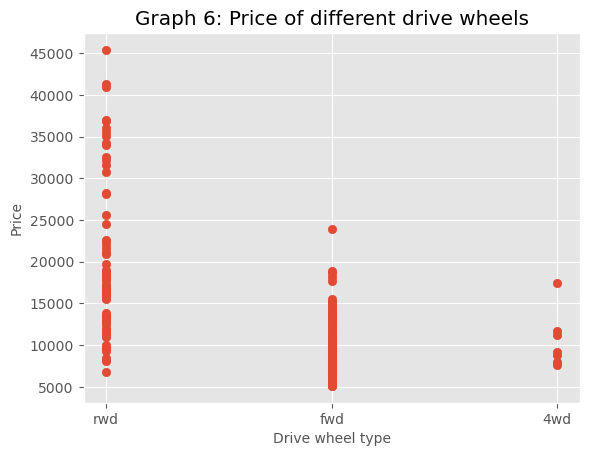

In [63]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


plt.scatter(df['drive_wheels'], df['price'])
plt.title("Graph 6: Price of different drive wheels")
plt.xlabel('Drive wheel type', size=10)
plt.ylabel('Price', size=10)
plt.show()

In [64]:
#ANOVA
f_val, p_val = stats.f_oneway(grouped_test1.get_group('fwd')['price'], grouped_test1.get_group('rwd')['price'], grouped_test1.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


F-score showing a strong correlation and p-value almost 0 implying almost statistically significant. Let's examine them separately to test whether all of groups are highly correlated by t-test in pair. In detail, comparing one group's mean price to another group mean price.

In [65]:
from scipy.stats import ttest_ind

- fwd and rwd

In [66]:
t_stat, p_val = ttest_ind(grouped_test1.get_group('fwd')['price'], grouped_test1.get_group('rwd')['price'])  
print( "t-stats: t=", f_val, ", P =", p_val )

t-stats: t= 67.95406500780399 , P = 2.2355306355677783e-23


- 4wd and rwd

In [67]:
t_stat, p_val = ttest_ind(grouped_test1.get_group('4wd')['price'], grouped_test1.get_group('rwd')['price'])  
print("t-stats: t=", f_val, ", P =", p_val)

t-stats: t= 67.95406500780399 , P = 0.004411492211225317


- 4wd and fwd


In [68]:
t_stat, p_val = ttest_ind(grouped_test1.get_group('4wd')['price'], grouped_test1.get_group('fwd')['price'])  
print("t-stats: t=", f_val, ", P =", p_val)

t-stats: t= 67.95406500780399 , P = 0.4162011669784619


### Conclusion: Important Variables
After narrowed it down, the following variables are important to take into account when predicting the car price.

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore 

Categorical variables:
    Drive_wheels

## 4. Prediction model
Section objective: Train a prediction model by using fit method to estimate how much a car should cost based on its features.

### 4a. Predict car price using more than one predictors
From above conclusion, four good predictors of price are: 
- Horsepower
- Curb_weight
- Engine_size
- Highway_mpg

As there are multiple predictors, proceeding Multiple Linear Regression model under assumption that there is linear relationship between price and 4 car features.

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
#Multiple Linear Regression model
#create multiple linear object
lm = LinearRegression()
#create multiple linear function
Z = df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]
#fit model
lm.fit(Z, df['price'])

LinearRegression()

In [71]:
#intercept b0
lm.intercept_

-15811.863767729243

In [72]:
#slope (coefficients) b1, b2, b3, b4 
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

Linear function from estimation above:


Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb_weight + 81.95906216 x engine_size + 33.58258185 x highway_mpg


### 4b. Model Evaluation using visualization

Distribution plot to visualize a Multiple Linear Regression to consider how fit that model and compare the distribution of actual values.

In [73]:
#predicted price (Y_hat_multi) from Multiple Linear Regression Model
Y_hat_multi=lm.predict(Z)
Y_hat_multi[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

In [74]:
width = 12
height = 10

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_44652/3453714420.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_44652/3453714420.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

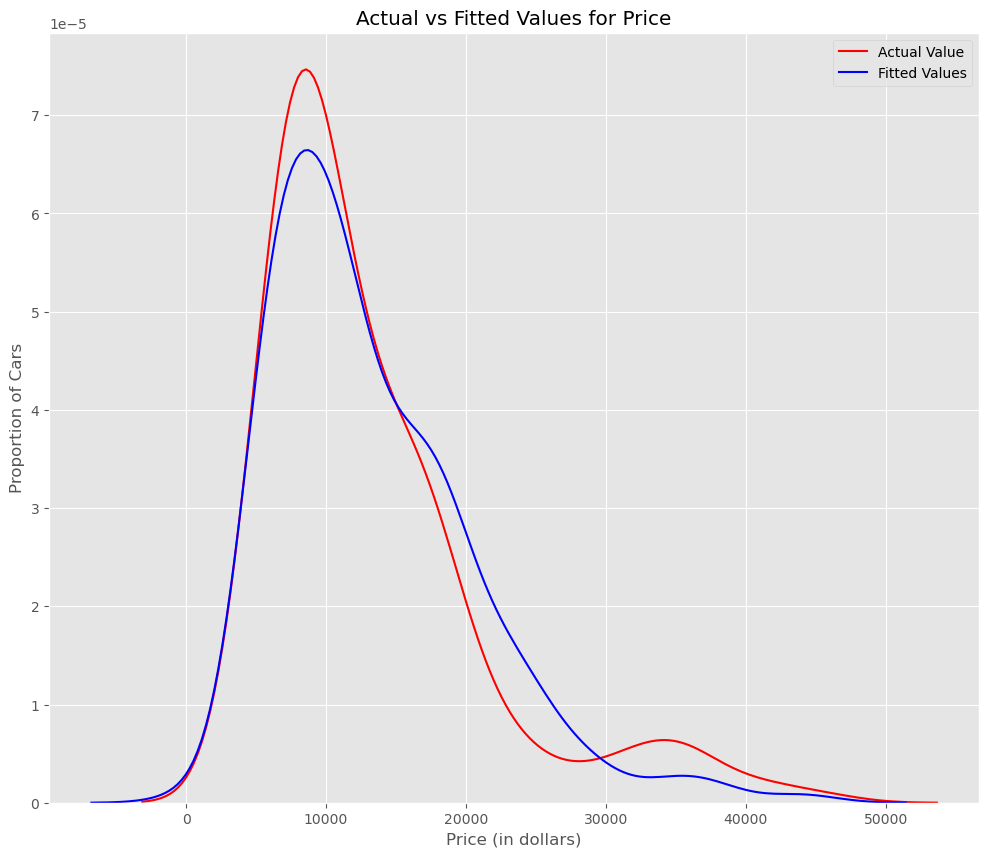

In [75]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_multi, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

Although the fitted values are close to actual values because of overlapping of two distribution, there is some room for improvement such as the gap areas at the top and right tail of a distribution. 

Regression plot to visualize the relationship between price and four main predictors concluded above.  

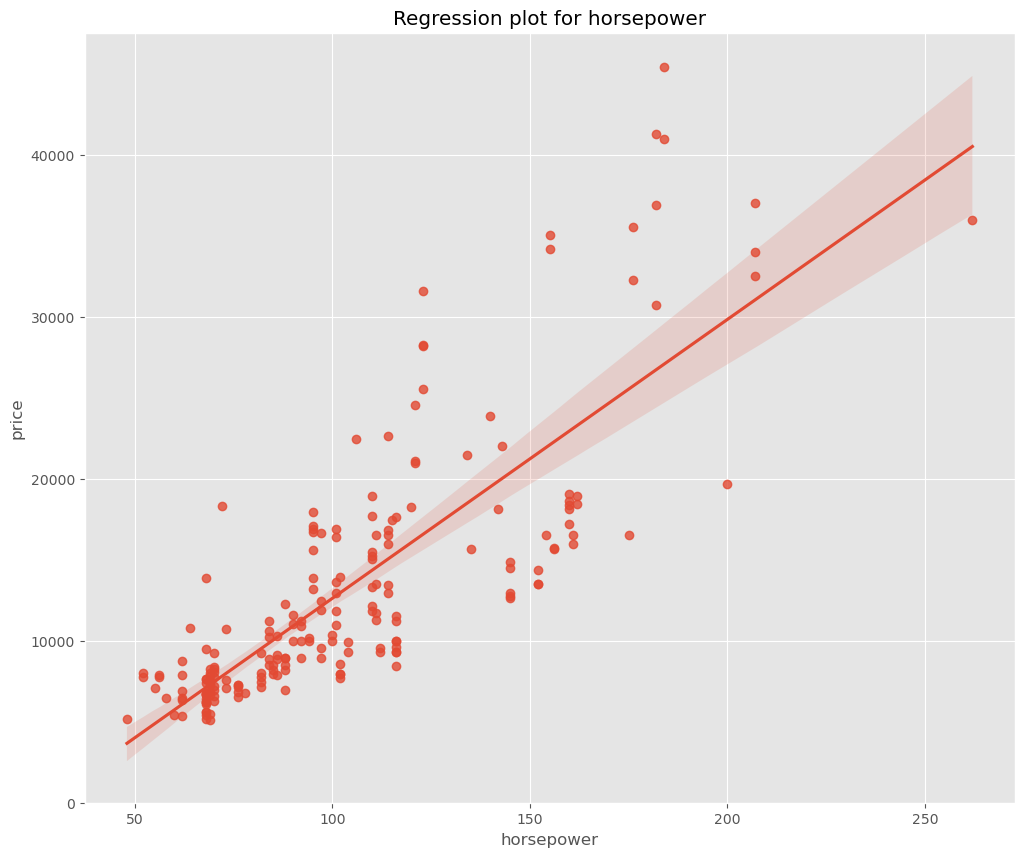

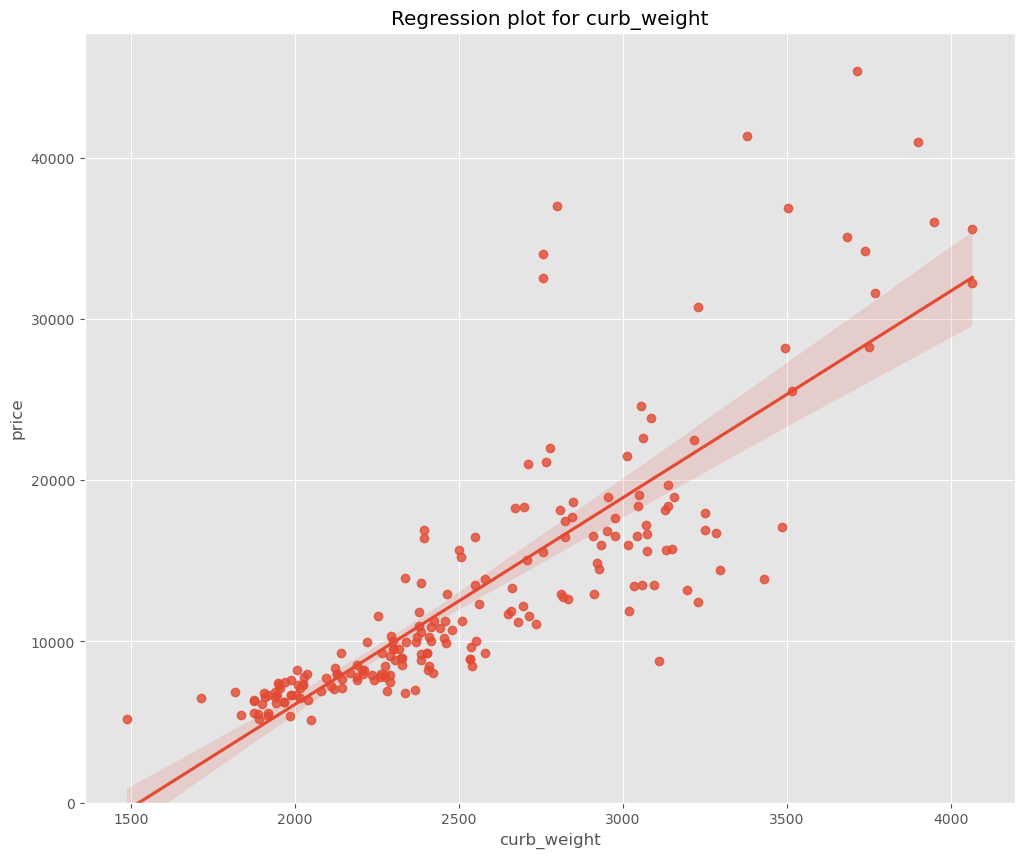

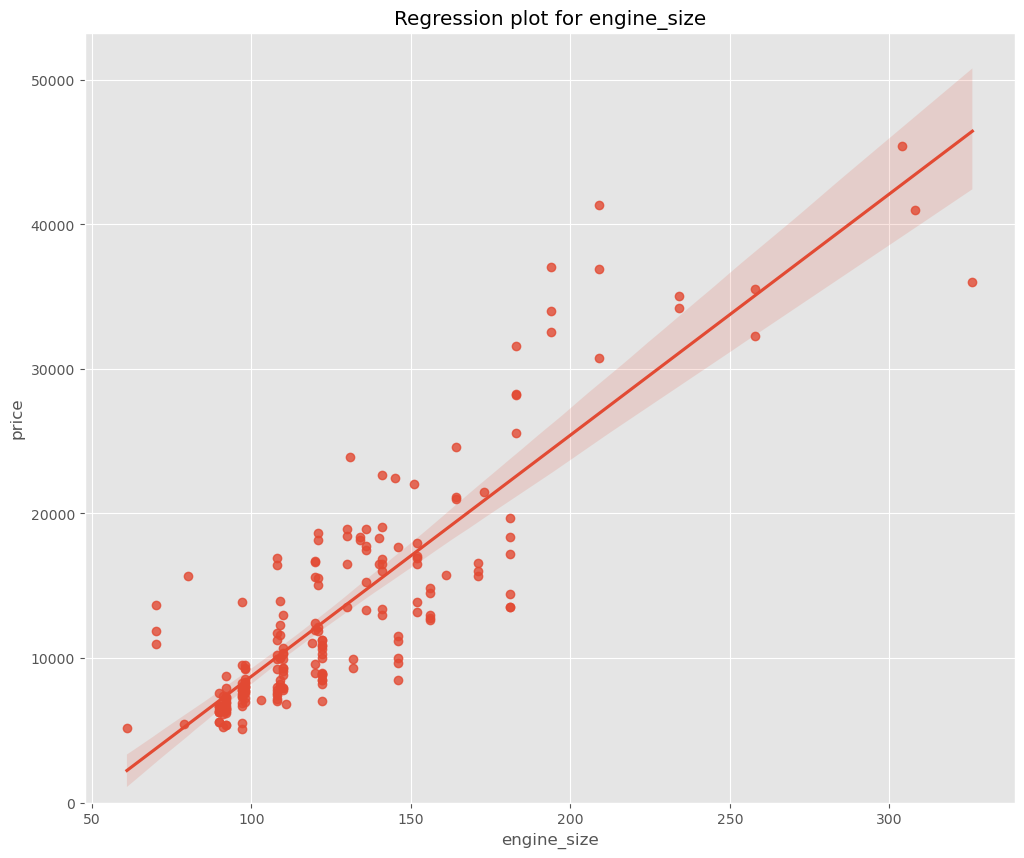

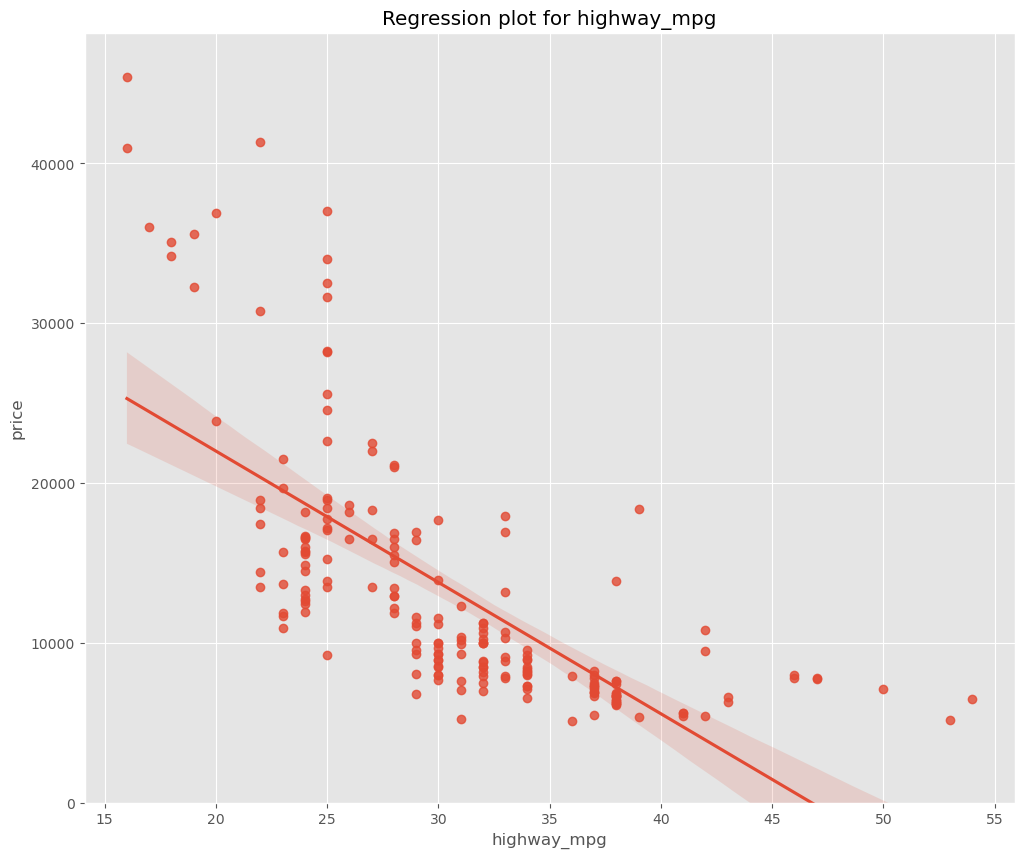

In [76]:
#regression plot for 4 preditors
#array of predictors
predictors = ['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']

#loop through each predictor to display regression plot
for predictor in predictors:
    plt.figure(figsize=(width, height))
    sns.regplot(x=df[predictor], y=df['price'])
    plt.title(f"Regression plot for {predictor}")
    plt.ylim(0,)
    plt.show()

Conclusion:

There is positive correlated between price and 'horsepower', 'curb_weight', 'engine_size' since the regression slope is positive. 
In contrast, between price and 'high_mpg' is a negative correlated because the regression slope is negative.
In addition, all data points in four regression plots scatter near the regression line which indicates the variance of data is low and linear model would be a best fit.  


Residual plot to visualize how fit a linear regression model could be for each predictor and response

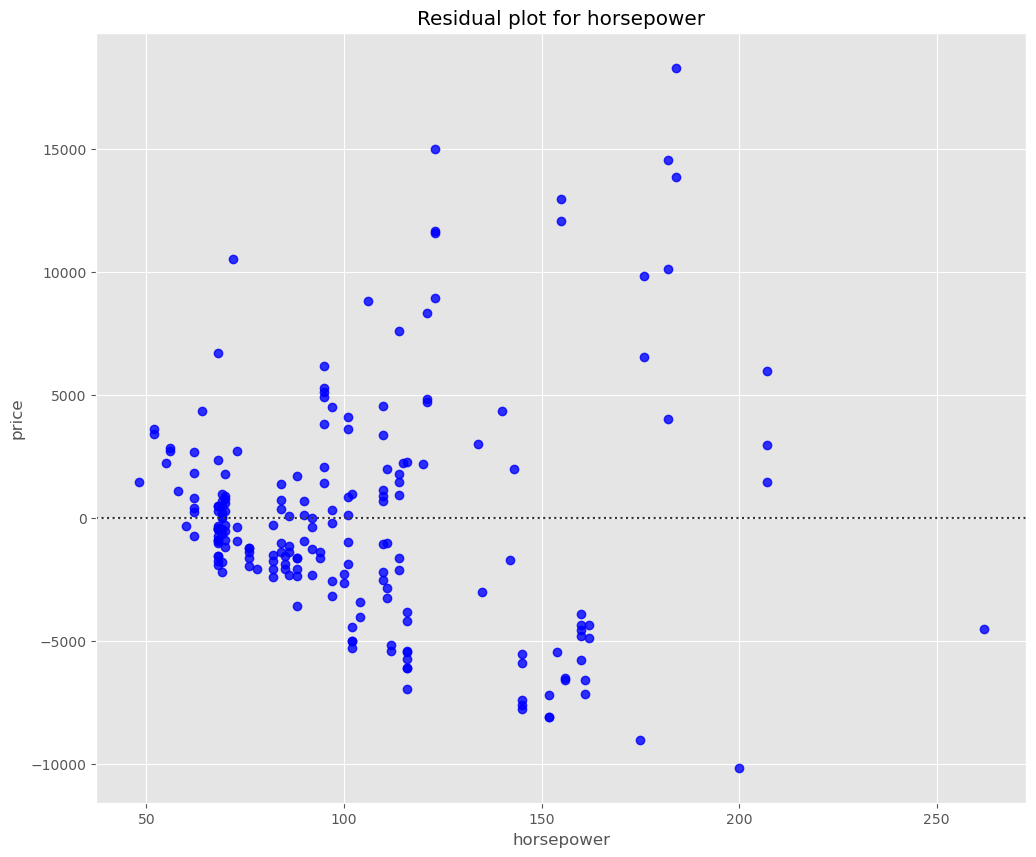

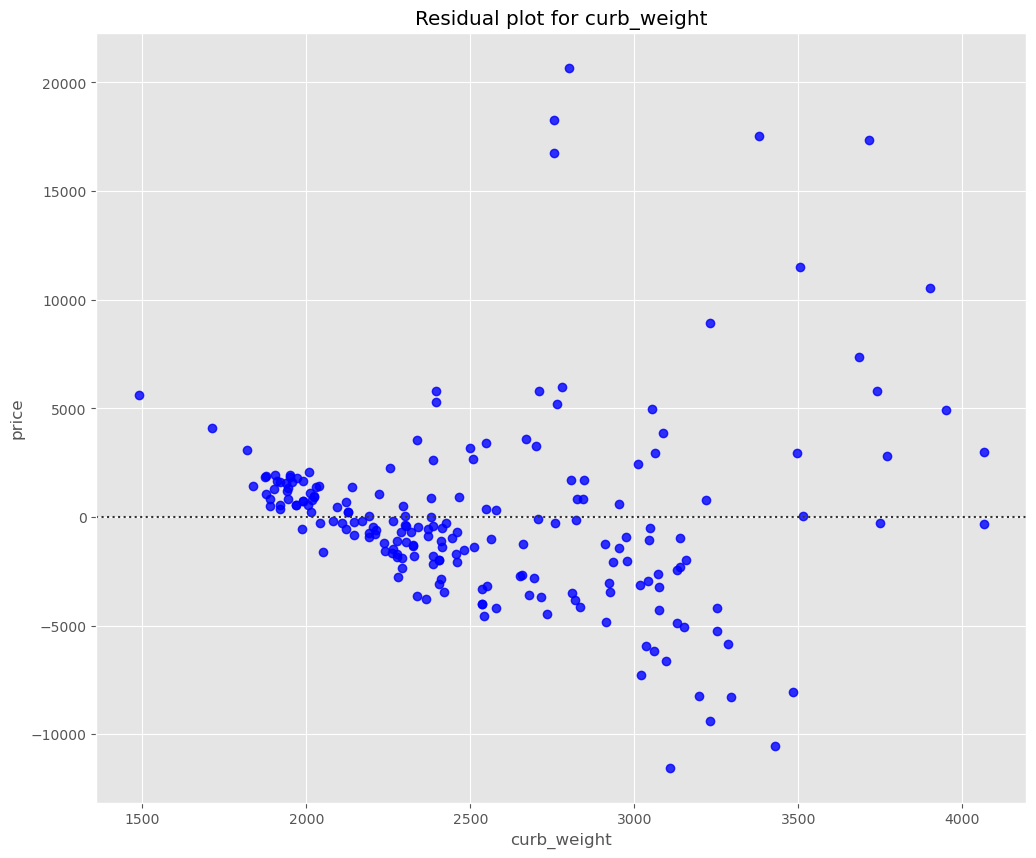

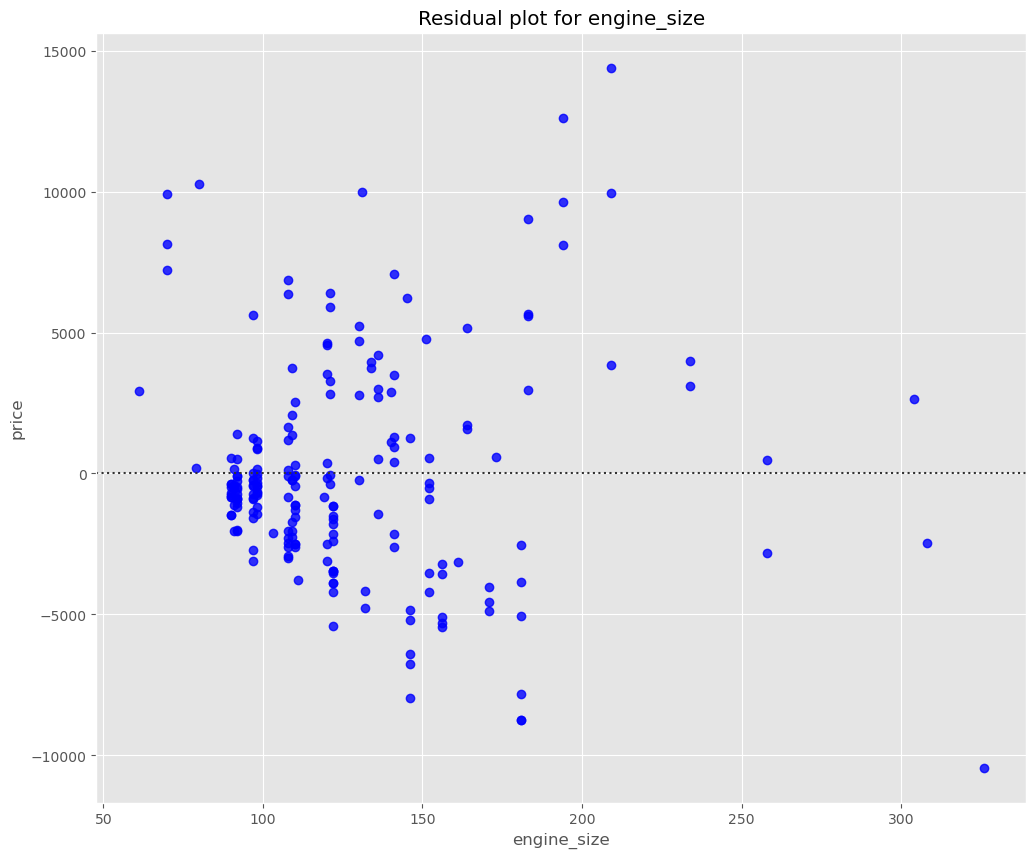

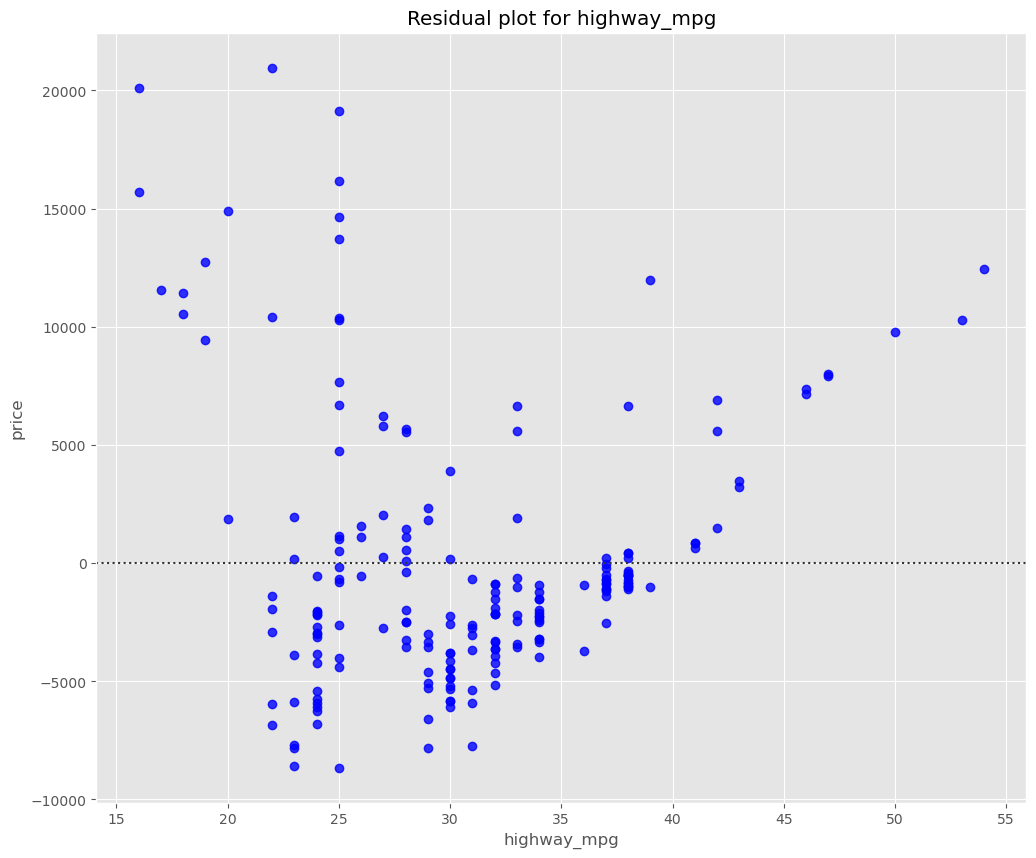

In [77]:
#residual plot for 4 preditors
width = 12
height = 10

#loop through each predictor to display regression plot
for predictor in predictors:
    plt.figure(figsize=(width, height))
    sns.residplot(x=df[predictor], y=df['price'], color='blue')
    plt.title(f"Residual plot for {predictor}")
    plt.show()

Conclusion:

From these residual plot that residuals are not randomly spread around x-axis, leading to believe that maybe a non-linear model is more appropriate for this data.
In particular, residual plots of 'horsepower', 'curb_weight', 'engine_size' show funnel shape pattern and residual plot of 'highway_mpg' shows U shape. Hence, in this case, let's try fitting a Polynomial Regression.

Polynomial Regression

In [78]:
#create function to plot poli data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100) #refer regression plot to choose start & end, but why 100 but not 201?
    y_new = model(x_new) #response of applying model to new domain of x_new

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [79]:
#variables
x = df['highway_mpg']
y = df['price']

In [80]:
#fit polynomial of 3rd order (cubic) model
f = np.polyfit(x, y, 3)
#p is model and to pass to PlotPolly as a "model" param
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [81]:
y_hat=p(x)
y_hat

array([14483.47732606, 14483.47732606, 15876.76908652, 11210.24198667,
       23210.06482401, 17436.73388684, 17436.73388684, 17436.73388684,
       28063.54752614, 12159.55360585, 12159.55360585, 13247.51877574,
       13247.51877574, 17436.73388684, 23210.06482401, 23210.06482401,
       28063.54752614,  6162.84640189,  7237.04153267,  7237.04153267,
        7247.75722475,  7486.4972933 , 11210.24198667,  7486.4972933 ,
        7486.4972933 ,  7486.4972933 , 11210.24198667, 11210.24198667,
       19172.71155671,  5739.27108586,  7486.4972933 ,  7233.78149649,
        8612.73442281,  8612.73442281,  8612.73442281,  8612.73442281,
        9100.83013627,  9100.83013627,  9100.83013627,  9100.83013627,
       13247.51877574, 10390.24408849, 12159.55360585, 12159.55360585,
       30819.68698954, 30819.68698954, 37037.46128959, 10390.24408849,
        7486.4972933 ,  7486.4972933 ,  7486.4972933 ,  7486.4972933 ,
       21094.04192587, 21094.04192587, 21094.04192587, 21094.04192587,
      

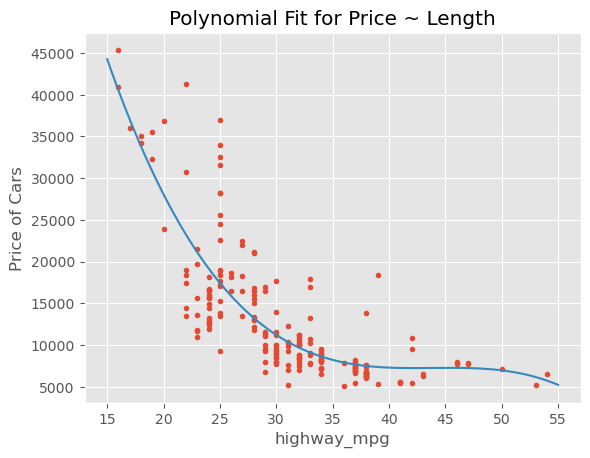

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [82]:
#display poly plot by call PlotPolly function
PlotPolly(p, x, y,'highway_mpg')
np.polyfit(x,y,3)

- Pipelines

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [84]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [85]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [86]:
#Standard Scaler take float only so convert Z
# Z = df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]
Z=Z.astype(float)
pipe.fit(Z,y)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [87]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

### 4c. Consider how accurate the model based on Statistics:
- R squared (btw 0-1)
- Mean Square Error (MSE)

Multiple Linear Regression
R^2

In [88]:
#Z fit model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


The simple Linear Regression between highway_mpg and price almost perfectly predicts the car price (~81%).

Multiple Linear Regression
 MSE
 

In [89]:
Y_predict_multifit = lm.predict(Z)

In [90]:
from sklearn.metrics import mean_squared_error


print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.349818885


Polynomial Regression R^2


In [91]:
from sklearn.metrics import r2_score

In [92]:
r_square = r2_score(y, p(x))
print('The R-square value is: ' , r_square)

The R-square value is:  0.6741946663906513


~67.419% of variation of price is explained by this polynomial fit.

Polynomial Regression MSE

In [93]:
mean_squared_error(df['price'], p(x))

20474146.42636125

## 5. Car price prediction 

### 5a. Prediction

Section objective: Using predict method to produce a prediction and visualizing by plot chart.

In [95]:
X = df[['highway_mpg']]
Y = df['price']

In [96]:
#fit model - lm.fit(X,Y)
lm.fit(X,Y)
lm

LinearRegression()

In [99]:
#Try predict car price with 30 highway_mpg
lm.predict(np.array(30.0).reshape(-1,1))

/Users/thaonguyen/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13771.3045085])

In [102]:
#create new_input to generate a sequence from 1 to 100
new_input=np.arange(1,100,1).reshape(-1,1)
new_input

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [97]:
yhat=lm.predict(new_input)
print(yhat)

[ 37601.57247984  36779.83910151  35958.10572319  35136.37234487
  34314.63896655  33492.90558823  32671.1722099   31849.43883158
  31027.70545326  30205.97207494  29384.23869662  28562.50531829
  27740.77193997  26919.03856165  26097.30518333  25275.57180501
  24453.83842668  23632.10504836  22810.37167004  21988.63829172
  21166.9049134   20345.17153508  19523.43815675  18701.70477843
  17879.97140011  17058.23802179  16236.50464347  15414.77126514
  14593.03788682  13771.3045085   12949.57113018  12127.83775186
  11306.10437353  10484.37099521   9662.63761689   8840.90423857
   8019.17086025   7197.43748192   6375.7041036    5553.97072528
   4732.23734696   3910.50396864   3088.77059031   2267.03721199
   1445.30383367    623.57045535   -198.16292297  -1019.8963013
  -1841.62967962  -2663.36305794  -3485.09643626  -4306.82981458
  -5128.5631929   -5950.29657123  -6772.02994955  -7593.76332787
  -8415.49670619  -9237.23008451 -10058.96346284 -10880.69684116
 -11702.43021948 -12524.16

/Users/thaonguyen/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


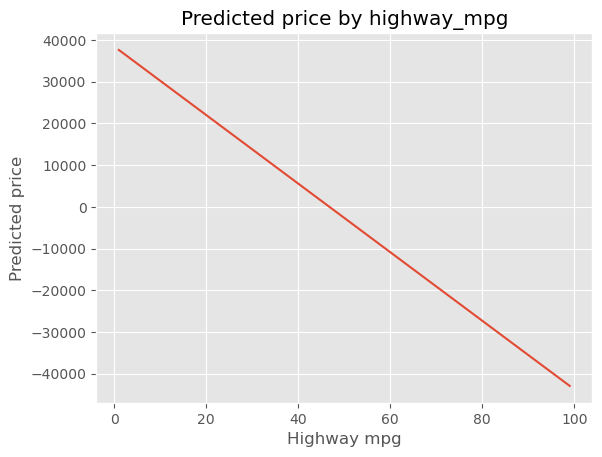

In [100]:
#plot data
plt.plot(new_input, yhat)
plt.title ('Predicted price by highway_mpg')
plt.xlabel('Highway mpg')
plt.ylabel('Predicted price')
plt.show()

In this case we see there are negative predicted prices while plotting predicted values due to the value in new_input range is not realistic (from 0 to 100, range of highway_mpg > 45).

### 5b. Evaluation

The model with higher the R^2 value is better fit for the data.
The model with the smallest MSE value is better fit for the data.

Multiple Linear Regression (MLR): Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

- R-squared: 0.80896354913783497

- MSE: 1.2 x10^7


Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

- R-squared: 0.6741946663906514

- MSE: 2.05 x 10^7

MLR vs. Polynomial Fit
- MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.



### 5c. Conclusion
Conclude that the MLR model is the best model to be able to predict car price from this dataset. This result makes sense since 27 variabales in total and one of those are potential predictors of the final car price. 